### Imports & Installation

In [1]:
%pip install pandas scikit-learn xgboost matplotlib seaborn


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade xgboost scikit-learn pandas cython --quiet



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install shap --quiet



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 1.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

### Climate & Weather Similarity: Southern California vs Portugal

Both Southern California and Portugal have a **Mediterranean climate (Köppen Csa)**, but there are some key nuances. Here’s a structured comparison:

---

#### Similarities

| Feature               | Southern California        | Portugal                      | Similarity       |
|-----------------------|----------------------------|-------------------------------|------------------|
| **Climate Type**      | Mediterranean (Csa)        | Mediterranean (Csa)           | ✅ Very similar   |
| **Dry Summers**       | Very dry, especially inland| Dry, especially in the south  | ✅ Very similar   |
| **Wet Winters**       | Mildly wet winters         | Wettest season is also winter| ✅ Similar        |
| **Plenty of Sun**     | 280–330 sunny days/year    | 250–300 sunny days/year       | ✅ Very similar   |
| **Moderate Humidity** | Usually low to moderate    | Low to moderate, coastal breezes | ✅ Similar     |
| **Wildfire Risk**     | High in summer/fall        | Some risk in central/southern Portugal | ⚠️ Slight difference in scale |

---

#### Key Differences

| Factor                  | Southern California                         | Portugal                                     |
|------------------------|---------------------------------------------|----------------------------------------------|
| **Temperature Range**  | More extreme inland (e.g., Palm Springs)    | More moderated overall due to Atlantic       |
| **Rainfall**           | Less rainfall (~15 in/year)                 | More rainfall (~20–40 in/year in most areas) |
| **Ocean Influence**    | Cold Pacific Current                        | Warm Atlantic Current                        |
| **Seasonal Shift**     | Longer, drier summers                       | More defined spring/fall transitions         |
| **Coastal Humidity**   | Drier (e.g., Santa Barbara)                 | More humid near coast (esp. Lisbon, Porto)   |

---

#### Overall Similarity Rating: **8.5/10**

- **SoCal coastal cities** (San Diego, LA, Santa Barbara) vs **Southern Portugal (Algarve)**: **9/10**
- **Inland SoCal** (e.g., Riverside, Palm Springs) vs **Portugal overall**: **7/10**



In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null

### Setting up Labels, Features, and Data Splits

In [7]:
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes

X = df.drop('area', axis=1)
y = df['area']

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

### Building RF (Random Forest Model)

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [9]:
def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}\n")

evaluate(y_test, rf_preds, "Random Forest")

--- Random Forest ---
R² Score: -0.057
MAE: 1.218
RMSE: 1.525



### Visualizations

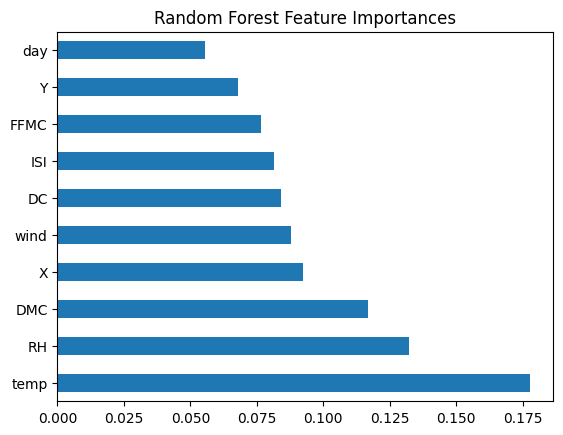

In [10]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.show()

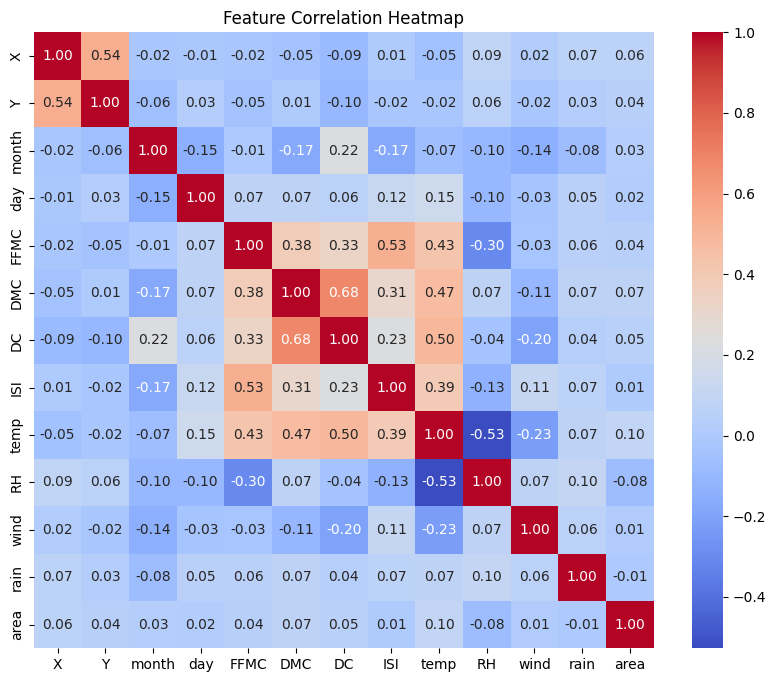

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

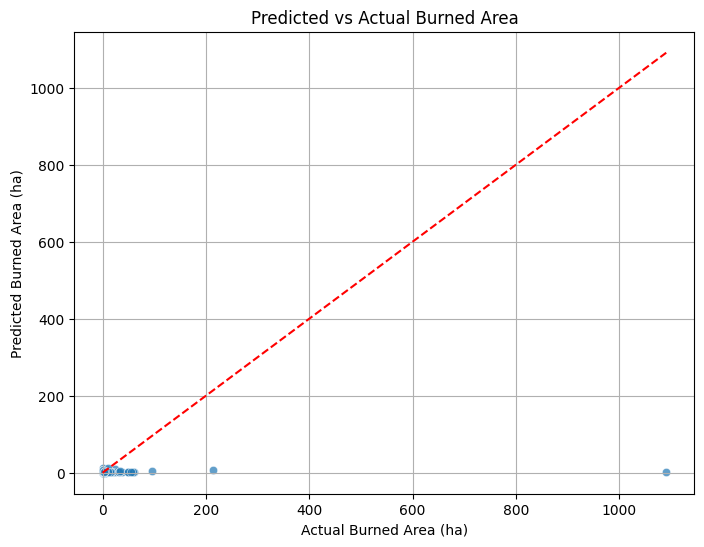

In [12]:
import numpy as np

y_pred = rf.predict(X_test)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.7)
plt.plot([0, max(y_test_exp)], [0, max(y_test_exp)], 'r--')  # perfect line
plt.xlabel("Actual Burned Area (ha)")
plt.ylabel("Predicted Burned Area (ha)")
plt.title("Predicted vs Actual Burned Area")
plt.grid(True)
plt.show()

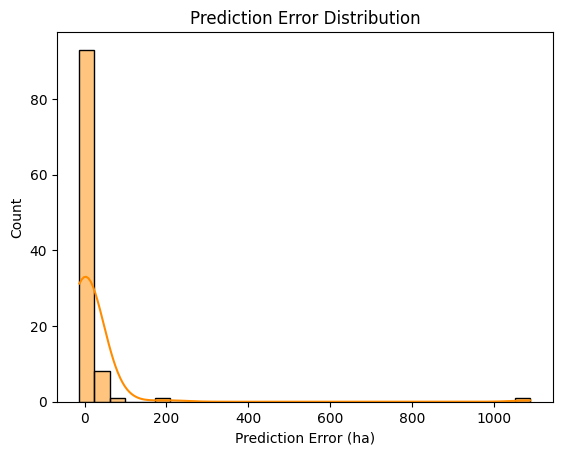

In [13]:
errors = y_test_exp - y_pred_exp
sns.histplot(errors, bins=30, kde=True, color='darkorange')
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error (ha)")
plt.show()

/Users/nikhilmaturi/nighthawk/nikhil_2025/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


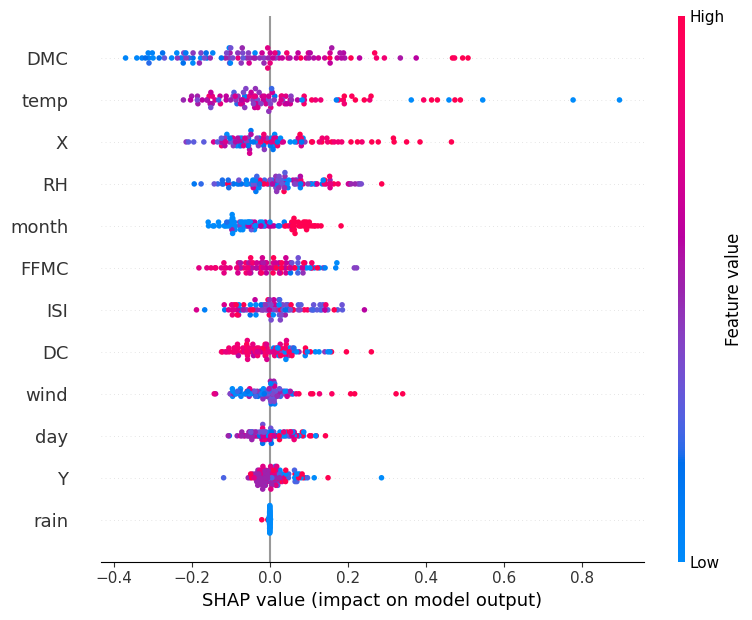

In [16]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Feature (FFMC, DMC, DC, ISI) Modelling

In [17]:
def estimate_FFMC(temp, rh, wind, rain):
    return max(18, min(101, 0.5 * temp - 0.3 * rh + 0.4 * wind - 0.5 * rain + 85))

In [18]:
def estimate_DMC(temp, rh, rain):
    return max(0, 0.6 * temp - 0.35 * rh - 1.5 * rain + 33)

In [19]:
def estimate_DC(temp, rain):
    return max(0, 0.5 * temp - 2 * rain + 100)

In [20]:
def estimate_ISI(ffmc, wind):
    return max(0, 0.208 * ffmc * wind / (90 + wind))

### Test Implementation

In [21]:
weather_data = {
    "temp": 27.0,     # °C
    "RH": 45,         # relative humidity %
    "wind": 12.0,     # km/h
    "rain": 0.0,      # mm
    "month": "aug",
    "day": "fri",
    "X": 4,
    "Y": 4
}

FFMC = estimate_FFMC(weather_data["temp"], weather_data["RH"], weather_data["wind"], weather_data["rain"])
DMC = estimate_DMC(weather_data["temp"], weather_data["RH"], weather_data["rain"])
DC = estimate_DC(weather_data["temp"], weather_data["rain"])
ISI = estimate_ISI(FFMC, weather_data["wind"])

In [22]:
month_map = {'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
day_map = {'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6}

input_vector = pd.DataFrame([{
    "X": weather_data["X"],
    "Y": weather_data["Y"],
    "month": month_map[weather_data["month"].lower()],
    "day": day_map[weather_data["day"].lower()],
    "FFMC": FFMC,
    "DMC": DMC,
    "DC": DC,
    "ISI": ISI,
    "temp": weather_data["temp"],
    "RH": weather_data["RH"],
    "wind": weather_data["wind"],
    "rain": weather_data["rain"]
}])


In [27]:
pred_log = rf.predict(input_vector)[0]
predicted_area = np.expm1(pred_log)  # reverse log1p

print(f"Predicted Burned Area: {predicted_area:.3f} hectares")

Predicted Burned Area: 3.167 hectares


In [ ]:
import math

def hectares_to_radius_m(hectares):
    area_m2 = hectares * 10000
    radius = math.sqrt(area_m2 / math.pi)
    return radius

In [30]:
import folium

fire_lat = 41.8
fire_lon = -7.5


predicted_area_ha = 3.167 # fire size from model prediction in hectares
radius_m = hectares_to_radius_m(predicted_area_ha)

fire_map = folium.Map(location=[fire_lat, fire_lon], zoom_start=12)

folium.Circle(
    location=[fire_lat, fire_lon],
    radius=radius_m,
    popup=f"{predicted_area_ha:.1f} ha estimated fire spread",
    color="red",
    fill=True,
    fill_opacity=0.4
).add_to(fire_map)

fire_map
